In [1]:
# This is a sample Python script.
import matplotlib.pyplot as plt
import pickle
# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.
from Sender import *
# from Receiver import *
import sounddevice as sd
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
import cv2

# Press the green button in the gutter to run the script.


sender = Sender(1000, 5000)
sender.load_text('data/text.txt')
sender.load_image('data/1_20_Imagen1.png')
audio_texto = sender.send_text()
audio_img = sender.send_image()

if len(audio_texto) > len(audio_img):
    audio_img = np.pad(audio_img, (0, len(audio_texto) - len(audio_img)), 'constant')
else:
    audio_texto = np.pad(audio_texto, (0, len(audio_img) - len(audio_texto)), 'constant')
    
audio = audio_texto + audio_img
# #wavfile.write('audio3.wav', 44100,audio)
sender.playText(audio)

# receiver = Receiver(600, 800)
# audio = receiver.listen(60)
# wavfile.write("audio2.wav", 44100, audio)
# print("Done listening")

# fs, audio = wavfile.read("audio1.wav")

# audio = audio[44100:]

# # Normalize signal

# audio = audio/np.max(np.abs(audio))
# audio = audio - np.mean(audio)

# # Plot signal

# plt.plot(audio)
# plt.show()

# # Demodulate signal




ValueError: shapes (7,4) and (840,771) not aligned: 4 (dim 1) != 840 (dim 0)

In [2]:
freq,audio_wav =  wavfile.read('audio_mac_low_freq.wav',44100)

In [3]:
from scipy.fftpack import fft,fftfreq

In [4]:
l = len(audio_wav)//4

In [5]:
fft_audio = fft(audio_wav)

In [6]:
freqs = fftfreq(len(fft_audio),1/freq)

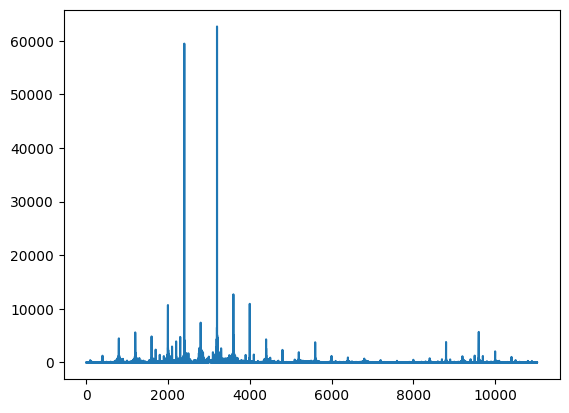

In [7]:
plt.plot(freqs[0:l],np.abs(fft_audio)[0:l])

In [8]:
audio_wav_fix = audio_wav

In [9]:
audio_wav.shape

(3087000,)

In [11]:
receiver = Receiver(1000, 5000)

In [12]:
audio_listen = receiver.listen(70)

Listening
Done listening


In [13]:
wavfile.write('audio_mac_new_dict.wav',44100,audio_listen)

In [14]:
audio_listen_reshaped = audio_listen.reshape(-1)

In [15]:
freq,audio_wav =  wavfile.read('audio_mac_new_dict.wav',44100)

In [16]:
bits = receiver.decode_image(audio_wav,20)

132953
2909947


In [17]:
bits.shape

(20, 20, 3)

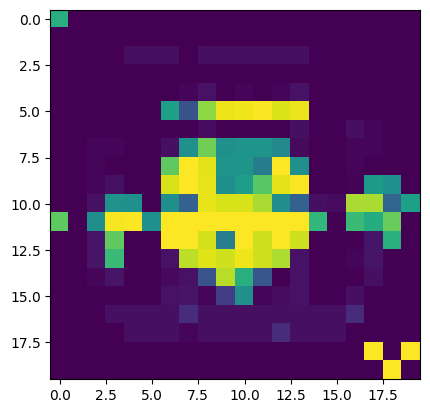

In [18]:
plt.imshow(bits[:,:,2])

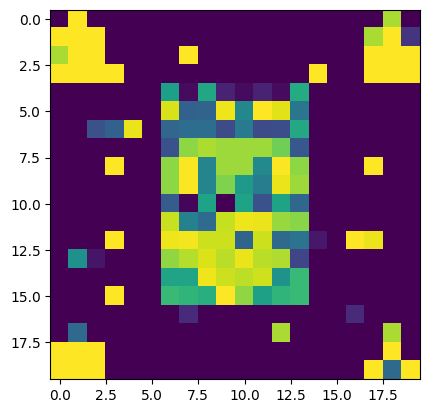

In [19]:
plt.imshow(bits[:,:,0])

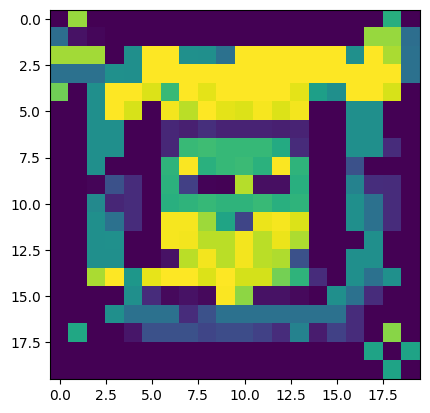

In [20]:
plt.imshow(bits[:,:,1])

In [21]:
bits = bits.astype(int)

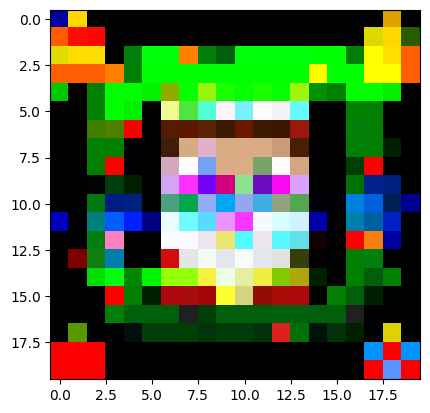

In [22]:
plt.imshow(bits, cmap='gray')

In [23]:
img = cv2.imread('data/1_20_Imagen1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [24]:
red = img[:,:,2]
green = img[:,:,1]
blue = img[:,:,0]

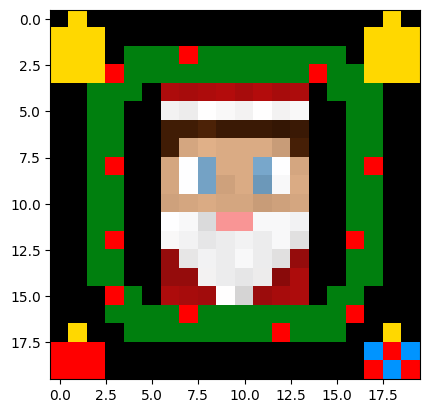

In [25]:
plt.imshow(img)

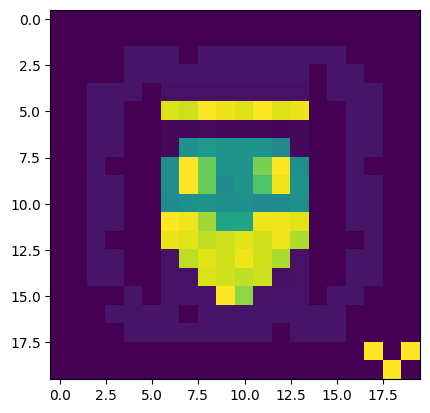

In [26]:
plt.imshow(red)


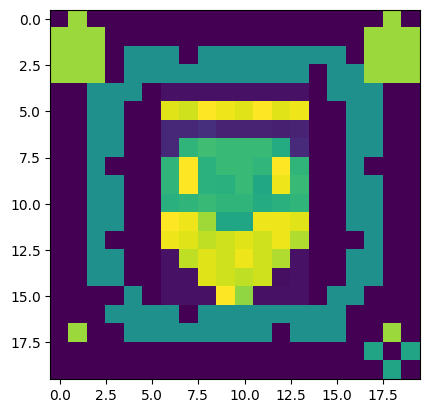

In [27]:
plt.imshow(green)

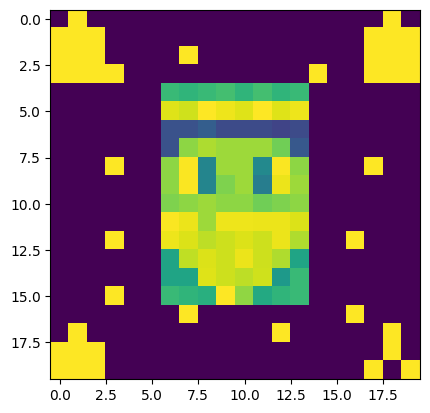

In [28]:
plt.imshow(blue)

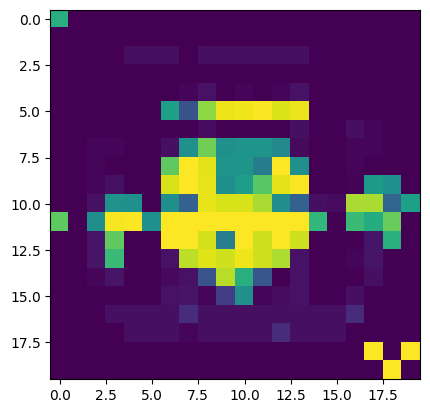

In [29]:
plt.imshow(bits[:,:,2])